In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#插入画布
%matplotlib inline

In [13]:
conn = MongoClient(host='127.0.0.1', port=27017)  ## 实例化MongoClient
db = conn.get_database('Laborday')  #连接Laborday这个数据库

col = db.get_collection('ticket') # 连接到集合ticket
mon_data = col.find()  # 查询这个集合下的所有记录

In [14]:
data = json_normalize([rec for rec in mon_data])#转为dataframe

In [15]:
data.to_csv('data.csv', index=False)#导出到csv

In [16]:
data.sample(5)#随机抽取5条

,_id,city,fields.cityName,fields.comment,fields.discountPrice,fields.distance,fields.features,fields.featuresNew,fields.fromName,fields.h5_url,...,fields.sold365,fields.soldRecent,fields.soldRecentNum,fields.subTitle,fields.tagList,fields.title,fields.titleTagInfos,fields.type,src,trip_main_busness_type
1182,5d0f05b33fa01f786d2836f3,秦皇岛,None,2,50,None,"[{'key': None, 'text': '17:00前可订今日票', 'color':...","[{'key': None, 'text': '17:00前可订今日票', 'color':...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售32笔,None,0,None,[],秦皇岛 xin 乐园大门票,[],None,mix,vocation
49747,5d0f09053fa01f786d28f4a8,丽江,None,0,323,None,"[{'key': None, 'text': '19:30前可订今日票', 'color':...","[{'key': None, 'text': '19:30前可订今日票', 'color':...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,None,None,0,None,[],G秒出票！热销推荐！云南丽江云南的响声 VIP门票20:00场,[],None,mix,vocation
31848,5d0f07de3fa01f786d28aebd,赤壁,None,1,88,None,"[{'key': None, 'text': '17:00前可订今日票', 'color':...","[{'key': None, 'text': '17:00前可订今日票', 'color':...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售13笔,None,0,None,[],【快速出票】咸宁赤壁春泉庄温泉电子门票 代订温泉酒店 会议室,[],None,mix,vocation
36301,5d0f082c3fa01f786d28c022,清远,None,0,88,None,"[{'key': None, 'text': '17:00前可订今日票', 'color':...","[{'key': None, 'text': '17:00前可订今日票', 'color':...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,None,None,0,None,[],广东清远天子山瀑布景区大门票+悬崖秋千+丛林彩虹玻璃滑道电子票,[],None,mix,vocation
55924,5d0f09753fa01f786d290cc9,北京,None,6,75,None,"[{'key': None, 'text': '16:30前可订今日票', 'color':...","[{'key': None, 'text': '16:30前可订今日票', 'color':...",None,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售20笔,月售2笔,2,None,[],故宫门票 北京 官网 含故宫珍宝馆钟表馆 当日全天票 身份证入园,[],None,mix,vocation


In [17]:
data.info()#查看数据情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61298 entries, 0 to 61297
Data columns (total 31 columns):
_id                       61298 non-null object
city                      61298 non-null object
fields.cityName           0 non-null object
fields.comment            56639 non-null object
fields.discountPrice      61298 non-null object
fields.distance           0 non-null object
fields.features           61298 non-null object
fields.featuresNew        56639 non-null object
fields.fromName           0 non-null object
fields.h5_url             56639 non-null object
fields.itemId             61298 non-null object
fields.itemTotalScore     56639 non-null float64
fields.latitude           61298 non-null float64
fields.longitude          61298 non-null float64
fields.native_url         0 non-null object
fields.p_score            61298 non-null object
fields.pc_url             61298 non-null object
fields.picUrl             61298 non-null object
fields.price              61298 non-null

### 1. 清洗数据
#### 1.1 把需要的字段挑出来

In [18]:
data.columns#查看数据表头

Index(['_id', 'city', 'fields.cityName', 'fields.comment',
       'fields.discountPrice', 'fields.distance', 'fields.features',
       'fields.featuresNew', 'fields.fromName', 'fields.h5_url',
       'fields.itemId', 'fields.itemTotalScore', 'fields.latitude',
       'fields.longitude', 'fields.native_url', 'fields.p_score',
       'fields.pc_url', 'fields.picUrl', 'fields.price', 'fields.scm',
       'fields.shortInfo', 'fields.sold365', 'fields.soldRecent',
       'fields.soldRecentNum', 'fields.subTitle', 'fields.tagList',
       'fields.title', 'fields.titleTagInfos', 'fields.type', 'src',
       'trip_main_busness_type'],
      dtype='object')

In [19]:
data.iloc[55]#取出第56行

_id                                                5d0f05a23fa01f786d28328c
city                                                                    石家庄
fields.cityName                                                        None
fields.comment                                                            0
fields.discountPrice                                                    117
fields.distance                                                        None
fields.features           [{'key': None, 'text': '17:00前可订今日票', 'color':...
fields.featuresNew        [{'key': None, 'text': '17:00前可订今日票', 'color':...
fields.fromName                                                        None
fields.h5_url             https://h5.m.taobao.com/trip/travel-detail/ind...
fields.itemId                                                  596798486188
fields.itemTotalScore                                                     0
fields.latitude                                                           0
fields.longi

In [20]:
col_keep = ['city', 'fields.comment', 'fields.discountPrice', 'fields.features', 'fields.itemId',
           'fields.itemTotalScore', 'fields.latitude', 'fields.longitude', 'fields.price',
           'fields.shortInfo', 'fields.sold365', 'fields.soldRecentNum', 'fields.tagList', 
            'fields.title', 'trip_main_busness_type']
data = data[col_keep]#只保留指定字段

In [21]:
data.info()#可以发现fields.comment有空，且fields.comment/discountPrice/itemId/price/soldRecentNum的数据类型不应该为object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61298 entries, 0 to 61297
Data columns (total 15 columns):
city                      61298 non-null object
fields.comment            56639 non-null object
fields.discountPrice      61298 non-null object
fields.features           61298 non-null object
fields.itemId             61298 non-null object
fields.itemTotalScore     56639 non-null float64
fields.latitude           61298 non-null float64
fields.longitude          61298 non-null float64
fields.price              61298 non-null object
fields.shortInfo          56639 non-null object
fields.sold365            36956 non-null object
fields.soldRecentNum      61298 non-null object
fields.tagList            61298 non-null object
fields.title              61298 non-null object
trip_main_busness_type    61298 non-null object
dtypes: float64(3), object(12)
memory usage: 7.0+ MB


In [22]:
data.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
34787,广州,0,53,"[{'key': None, 'text': '18:00前可订今日票', 'color':...",590533031500,0.0,0.0,0.0,53,广州,已售3笔,0,[],广州蓝海豚珠江夜游大沙头游船码头【中恒集团号】赏一城繁华,vocation
26045,威海,1,138,"[{'key': None, 'text': '20:30前可订今日票', 'color':...",550880229070,5.0,0.0,0.0,138,威海,已售10笔,0,[],【官方电子票】威海文登天沐温泉度假村旅游景区景点门票,vocation
41290,桂林,0,185,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",589929517807,0.0,0.0,0.0,185,桂林,None,0,[],【电子门票】桂林旅游景点 夜游两江四湖景区 豪华船票 空调游船,vocation
4091,盘锦,0,119,"[{'key': None, 'text': '出票后立即可用', 'color': Non...",592371381184,0.0,0.0,0.0,119,盘锦,None,0,[],盘锦沐清泉 单人洗浴汗蒸+经典玉足+普搓,vocation
5896,南京,0,48,"[{'key': None, 'text': '22:00前可订今日票', 'color':...",594421432487,0.0,0.0,0.0,48,南京,已售4笔,4,[],南京弘阳未来世界主题乐园 弘阳欢乐世界门票游乐场 摩天轮单票,vocation


1.2 去重

In [23]:
data.drop_duplicates(subset='fields.itemId', inplace=True)##按fields.itemId去重

#### 1.3 数据类型转换

In [24]:
# 由于np.nan是float，所以这里整体转换为float
data.loc[data['fields.comment'].isnull(), 'fields.comment'] = np.nan#fields.comment列为空的，改为nan
data['fields.comment'] = data['fields.comment'].astype(float)#转float

In [26]:
data['fields.discountPrice'] = data['fields.discountPrice'].astype(float)
#data['fields.itemId'] = data['fields.itemId'].astype(int)
data['fields.itemId'] = data['fields.itemId'].astype(np.int64)
data['fields.price'] = data['fields.price'].astype(float)
data['fields.soldRecentNum'] = data['fields.soldRecentNum'].astype(int)

#### 1.4 各字段清洗
- fields.features
- fields.sold365
- fields.tagList

In [27]:
data.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
12,石家庄,7.0,94.00,"[{'key': None, 'text': '15:45前可订今日票', 'color':...",550566844642,5.0,0.0,0.0,94.00,石家庄,已售71笔,63,[],白鹿温泉加勒比海滩水上乐园 加勒比海滩水上乐园大门票 电子票,vocation
28294,开封,0.0,59.99,"[{'key': None, 'text': '16:30前可订今日票', 'color':...",590568241226,0.0,0.0,0.0,59.99,开封,None,0,[],河南 开封府大门票预定1小时后生效闸机刷身份证入园000kk7129lyq,vocation
54,石家庄,0.0,55.00,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",596617233580,0.0,0.0,0.0,55.00,石家庄,已售2笔,2,[],【即出即用】河北 石家庄 嶂石岩成人电子票 门票,vocation
42331,海口,2.0,84.00,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",566308501416,5.0,0.0,0.0,84.00,海口,已售57笔,1,[],海南海口观澜湖温泉度假区火山岩温泉大门票旅游景点自由行门票,vocation
56075,天津,55.0,63.00,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",572094138742,5.0,0.0,0.0,63.00,天津,已售542笔,121,[],【活动价】天津欢乐谷玛雅海滩水公园水世界门票 全天通票含夜场,vocation


In [28]:
# fields.features清洗
def get_fea_text(data):
    if len(data) > 0:
        return data[0]['text']#直接只取出第一个元素里面的text
    else:
        return None


data['fields.features'] = data['fields.features'].apply(get_fea_text)#对fields.features的每一行调用get_fea_text()函数

In [29]:
data['fields.sold365'].sample(5)

55346     已售4笔
6759     已售10笔
47905     已售1笔
34305     None
26678     None
Name: fields.sold365, dtype: object

In [30]:
# fields.sold365清洗
def get_sold365(data):
    if data is None:
        return np.nan
    if "万" in data:#如果含有“万”字
        return float(data[data.find('售')+1:data.find('万')]) * 10000#提取“售”和“万”字之间的字，再乘以10000
    else:
        return float(data[data.find('售')+1:data.find('笔')])#提取“售”和“笔”字之间的字

    
data['fields.sold365'] = data['fields.sold365'].apply(get_sold365)#对fields.sold365的每一行调用get_sold365()函数

In [31]:
data['fields.tagList'].sample(5)

14192    []
49441    []
20941    []
44560    []
2099     []
Name: fields.tagList, dtype: object

In [32]:
# fields.tagList清洗
data['fields.tagList'] = data['fields.tagList'].apply(get_fea_text)#对fields.tagList的每一行调用get_fea_text()函数

#### 1.5 跟省份数据merge在一起

In [33]:
city_data = pd.read_csv('city_data.csv')#读取city_data数据

In [34]:
city_data.head()#查看前5行

,city,province
0,石家庄,河北省
1,邯郸,河北省
2,唐山,河北省
3,保定,河北省
4,秦皇岛,河北省


In [35]:
data_final = data.merge(city_data, on='city')##根据‘city’这个共同字段，city_data数据合并到data数据中去

In [36]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province
20314,南昌,1.0,28.0,13:00前可订今日票,524100366263,5.0,0.0,0.0,28.0,南昌,44.0,0,None,江西南昌汪山土库门票 新建汪山土库门票 企业单位团建,vocation,江西省
37806,海口,1015.0,108.0,18:00前可订今日票,538187440978,4.9,0.0,0.0,115.0,海口,8784.0,34,None,当天可订！海南海口热带野生动植物园门票动物园景点门票含熊猫馆,vocation,海南省
16694,池州,0.0,85.0,17:00前可订今日票,586182753589,0.0,0.0,0.0,85.0,池州,5.0,0,None,安徽九华山花台索道 单乘下行票| 灵秀地 佛交融 电子二维码取票,vocation,安徽省
27255,黄冈,0.0,240.0,最早可定明日票,581321676469,0.0,0.0,0.0,240.0,黄冈,NaN,0,None,英山南武当滑雪场 2小时滑雪门票（含板雪板、雪鞋、雪杖 ）,vocation,湖北省
20222,南昌,0.0,32.0,出票2小时后可用,583070884601,0.0,0.0,0.0,32.0,南昌,NaN,0,None,江西南昌梅岭景区 竹海明珠门票 电子票,vocation,江西省


In [37]:
data_final.to_csv('data_clean.csv', index=False)#导出清洗后的数据

In [38]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54590 entries, 0 to 54589
Data columns (total 16 columns):
city                      54590 non-null object
fields.comment            50572 non-null float64
fields.discountPrice      54590 non-null float64
fields.features           54233 non-null object
fields.itemId             54590 non-null int64
fields.itemTotalScore     50572 non-null float64
fields.latitude           54590 non-null float64
fields.longitude          54590 non-null float64
fields.price              54590 non-null float64
fields.shortInfo          50572 non-null object
fields.sold365            32357 non-null float64
fields.soldRecentNum      54590 non-null int32
fields.tagList            3544 non-null object
fields.title              54590 non-null object
trip_main_busness_type    54590 non-null object
province                  54590 non-null object
dtypes: float64(7), int32(1), int64(1), object(7)
memory usage: 6.9+ MB


### 问题
1. 哪些城市/省份的旅游选择最多？
2. 哪些城市最受游客青睐？
3. 最热门的景点
4. 各省份的好评热门景点
5. 很热门但是评分不好的景点
6. 打折力度最大的景点
7. 各级别景区的门票价格

#### 1. 哪些城市/省份的旅游选择最多？

In [39]:
count_top12 = data_final['fields.shortInfo'].value_counts()[:12]##每个城市计数，并取出前12个城市
count_top12

三亚    3034
杭州    2277
桂林    1656
上海    1652
北京    1570
广州    1562
厦门    1238
苏州     972
清远     965
香港     950
成都     922
常州     854
Name: fields.shortInfo, dtype: int64

In [74]:
#from pyecharts import Funnel
# funnel = Funnel("旅游选择最多的前12个城市", width = 800,height=600)
# funnel.add("", count_top12.index, count_top12.values, legend_top=30,
#            xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
#           )
# funnel

#漏斗图
from pyecharts import options as opts
from pyecharts.charts import Funnel

funnel = Funnel(init_opts=opts.InitOpts(width="800px",height="600px"))#初始化漏斗图
value=[int(i) for i in count_top12.values]
funnel.add("", [list(z) for z in zip(count_top12.index, value)])##
funnel.set_global_opts(title_opts=opts.TitleOpts(title="漏斗图-旅游选择最多的前15个城市"),
                      legend_opts=opts.LegendOpts(pos_top=30))
funnel.render_notebook()

In [57]:
count_province_top10 = data_final['province'].value_counts()#每个省的计数（并不是前10）

In [58]:
count_province_top10

浙江省         5688
广东省         5619
江苏省         4221
海南省         4061
山东省         3166
福建省         3144
湖北省         2723
广西壮族自治区     2603
安徽省         1938
河北省         1745
北京市         1645
云南省         1635
辽宁省         1571
四川省         1540
上海市         1507
陕西省         1436
江西省         1435
河南省         1300
香港           963
重庆市          914
湖南省          836
黑龙江省         734
澳门           729
甘肃省          551
天津市          481
贵州省          480
山西省          477
宁夏回族自治区      327
吉林省          310
内蒙古自治区       263
西藏自治区        191
新疆维吾尔自治区     157
台湾           147
青海省           53
Name: province, dtype: int64

In [64]:
##
province = [pro.replace("省", "") for pro in list(count_province_top10.index)]#去掉“省”字
province = [pro.replace("市", "") for pro in province]#去掉“市”字（直辖市）
province = [pro[:2] if "自治区" in pro else pro for pro in province]#如果含有自治区，就只取前两个字，否则返回本身
province[province.index("内蒙")]="内蒙古"#内蒙改为内蒙古
province

['浙江',
 '广东',
 '江苏',
 '海南',
 '山东',
 '福建',
 '湖北',
 '广西',
 '安徽',
 '河北',
 '北京',
 '云南',
 '辽宁',
 '四川',
 '上海',
 '陕西',
 '江西',
 '河南',
 '香港',
 '重庆',
 '湖南',
 '黑龙江',
 '澳门',
 '甘肃',
 '天津',
 '贵州',
 '山西',
 '宁夏',
 '吉林',
 '内蒙古',
 '西藏',
 '新疆',
 '台湾',
 '青海']

In [302]:
# province = ['广东','浙江','海南','江苏','山东','福建','广西','湖北','北京','安徽','四川','云南',
#             '辽宁','河北','上海','河南','江西','陕西','重庆','香港','湖南','澳门','黑龙江','甘肃',
#             '天津','贵州','山西','宁夏','吉林','内蒙古','台湾','西藏',
#             '新疆','青海']

In [77]:
# from pyecharts import Map

# map = Map("全国各省份旅游选择数量图", width=600, height=600)
# map.add(
#     "",
#     province,
#     count_province_top10.values,
#     maptype="china",
#     is_visualmap=True,
#     visual_text_color="#000",
#     visual_range=[0, 5000]
# )
# map

from pyecharts.charts import Map

value=[int(i) for i in count_province_top10.values]
map = Map(init_opts=opts.InitOpts(width="600px",height="600px"))
map.add("",[list(z) for z in zip(province, value)],"china")##
map.set_global_opts(title_opts=opts.TitleOpts(title="Map-全国各省份旅游选择数量图"))
map.render_notebook()

#### 2. 哪些城市最受游客青睐？

In [78]:
#按fields.shortInfo汇总对应的fields.soldRecentNum值，取前10
city_sale_top10 = data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)
city_sale_top10

fields.shortInfo
上海    147689
北京     68913
香港     61194
广州     59915
杭州     36763
成都     32394
苏州     25203
西安     23205
常州     22402
三亚     19911
Name: fields.soldRecentNum, dtype: int32

In [83]:
from pyecharts.charts import Bar

# bar = Bar("最近一个月售出门票Top10城市", width = 700,height=500)
# bar.add("", city_sale_top10.index, city_sale_top10.values, is_stack=True, 
#        xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True,
#        xaxis_rotate=20)
# bar

bar = Bar()
name=[str(i) for i in city_sale_top10.index]
value=[int(i) for i in city_sale_top10.values]
bar.add_xaxis(name)
bar.add_yaxis("",value)
bar.set_global_opts(title_opts=opts.TitleOpts(title="Bar-最近一个月售出门票Top10城市"))
bar.render_notebook()

In [84]:
data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)

fields.shortInfo
上海    147689
北京     68913
香港     61194
广州     59915
杭州     36763
成都     32394
苏州     25203
西安     23205
常州     22402
三亚     19911
Name: fields.soldRecentNum, dtype: int32

In [85]:
#取出itemTotalScore>0且comment>30的数据，并按城市计数itemTotalScore
city_favor_count = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].count()
city_favor_count

fields.shortInfo
万宁市       8
三亚      181
三明        9
上海      341
上饶       18
东莞       26
中卫       13
中山       12
临汾        1
临沂       22
丽水        9
丽江       44
乐山       13
九江        4
云浮        6
五指山市      6
佛山       34
保定        8
保山        5
信阳        3
儋州市       2
克拉玛依      1
六安        8
兰州        1
兴安        2
凉山        1
北京      208
北海       14
十堰        4
南京       97
       ... 
遵义        2
邯郸        2
郑州       39
郴州        5
鄂尔多斯      2
酒泉       19
重庆       59
金华       48
铜仁        3
银川       14
镇江       17
长春       13
长沙       18
阜阳        2
阳江       12
阳泉        1
阿勒泰       6
随州        6
雅安        4
青岛       85
鞍山        2
韶关        3
香港      237
马鞍山       3
鹰潭        4
黄冈       30
黄山       43
黔东南       1
齐齐哈尔      2
龙岩        7
Name: fields.itemTotalScore, Length: 226, dtype: int64

In [86]:
city_qual = list(city_favor_count[city_favor_count > 30].index)#列出30以上的城市

In [87]:
#取出itemTotalScore>0且comment>30且城市名在列表city_qual中的数据，并按城市计算itemTotalScore的均值，取前20
city_favor_top10 = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)&
                              (data_final['fields.shortInfo'].isin(city_qual))
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].mean().nlargest(20)

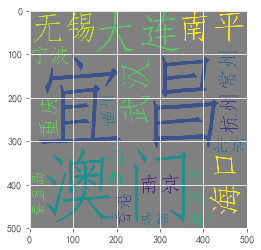

In [101]:
#from pyecharts import WordCloud
from wordcloud import WordCloud

name, value = city_favor_top10.index, city_favor_top10.values*10-30
frequency={key:val for key in name for val in value}#转成dict
wordcloud = WordCloud(width=500, height=500 ,background_color='gray',font_path='simfang.ttf',)##
#wordcloud.add("", name, value, word_size_range=[20, 80])
wordcloud.generate_from_frequencies(frequency)
plt.imshow(wordcloud)#画出图片

#### 3. 最热门的景点

In [106]:
#按soldRecentNum排序，取出前20个，取出title和soldRecentNum列
most_popular=data_final.sort_values(by='fields.soldRecentNum', 
                      ascending=False)[:10][['fields.title', 'fields.soldRecentNum']]
most_popular

,fields.title,fields.soldRecentNum
50320,上海迪士尼度假区,232192
9322,灵隐飞来峰,82956
52741,香港迪士尼乐园,71654
48194,故宫博物院,48899
29554,广州长隆水上乐园,46007
29552,广州长隆野生动物世界,33378
33571,珠海长隆海洋王国,32577
41462,东方明珠广播电视塔,29605
50322,上海海昌海洋公园,22642
41836,成都大熊猫繁育研究基地,21231


In [122]:
#most_popular = ['灵隐飞来峰', '上海迪士尼', '香港迪士尼', '广州长隆', '故宫博物院','珠海长隆', '九华山', '上海野生动物园', '东方明珠', '乌镇']
#most_popular_values = [119349+117729, 227123, 75092, 41234+25421, 50138,34822, 29984, 25642, 24243, 19557]
import pyecharts.options as opts

most_popular_name=[str(i) for i in most_popular['fields.title']]
most_popular_value=[int(i) for i in most_popular['fields.soldRecentNum']]
# bar = Bar("最热门的10个景点", width = 700,height=600)
# bar.add("", most_popular, most_popular_values, is_stack=True, 
#        xaxis_label_textsize=16, yaxis_label_textsize=14, is_label_show=True,
#        xaxis_rotate=25)
bar=Bar()
bar.add_xaxis(most_popular_name)
bar.add_yaxis("",most_popular_value)
#bar.set_global_opts(xaxis_opts=opts.LabelOpts(rotate=90))#AxisOpts axislabel_opts ###怎么修改使得横坐标标签显示全？
bar.render_notebook()

#### 4. 各省份的好评热门景点

In [123]:
data.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
33800,广州,99.0,498.0,最早可定明日票,542953829872,4.9,0.0,0.0,498.0,广州,823.0,11,None,广东 广州 广州长隆旅游度假区 野生动物世界+大马戏电子门票,vocation
20801,福州,0.0,90.0,21:00前可订今日票,570327897214,0.0,0.0,0.0,90.0,福州,NaN,0,None,福州源脉温泉门票|电子票、福州市区温泉旅游,vocation


In [124]:
def get_top1(data):
    return data.head(1)

In [125]:
#按province、itemTotalScore、soldRecentNum排序，并每个province取出1个数据（##这1个数据就是最大的）
province_top1 = data_final.sort_values(by=['province', 'fields.itemTotalScore', 'fields.soldRecentNum'], 
                      ascending=False).groupby('province').apply(get_top1)[['fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']].reset_index()
province_top1

,province,level_1,fields.title,fields.soldRecentNum,fields.itemTotalScore
0,上海市,50395,上海迪士尼门票一日票迪士尼乐园门票1日票亲子上海迪斯尼成人票,20176,5.0
1,云南省,44362,丽江千古情演出门票官方电子票贵宾席含丽江恋歌古城束河小车接送,549,5.0
2,内蒙古自治区,2467,内蒙古兴安阿尔山国家森林公园门票+观光车电子票免预约,173,5.0
3,北京市,48231,北京世园会门票中国世界园艺博览会门票北京延庆世园会,4015,5.0
4,台湾,48063,中国台湾台北故宫博物院门票 台北故宫博物院大门票 台湾旅游,846,5.0
5,吉林省,4205,l【电子票】吉林延边琵岩山风景区5D玻璃吊桥门票,60,5.0
6,四川省,42795,电子票-成都大熊猫基地门票大熊猫繁育研究基地大门票,4568,5.0
7,天津市,49908,【方特毕业季】天津方特欢乐世界活动票 支持身份证入园,362,5.0
8,宁夏回族自治区,47907,宁夏旅游中卫沙坡头景区门票 中卫沙坡头旅游 沙坡头门票 电子票,416,5.0
9,安徽省,16611,九华山天台索道上下联票天台索道票 即拍即用刷二维码乘坐,967,5.0


In [126]:
province_top1.drop(columns = 'level_1', inplace=True)#删掉一列
province_top1.rename(columns={'province':'省份', 'fields.title':'项目名', 
                             'fields.soldRecentNum':'销售数量', 'fields.itemTotalScore':'评分'}, 
                    inplace=True)#修改列名
province_top1

,省份,项目名,销售数量,评分
0,上海市,上海迪士尼门票一日票迪士尼乐园门票1日票亲子上海迪斯尼成人票,20176,5.0
1,云南省,丽江千古情演出门票官方电子票贵宾席含丽江恋歌古城束河小车接送,549,5.0
2,内蒙古自治区,内蒙古兴安阿尔山国家森林公园门票+观光车电子票免预约,173,5.0
3,北京市,北京世园会门票中国世界园艺博览会门票北京延庆世园会,4015,5.0
4,台湾,中国台湾台北故宫博物院门票 台北故宫博物院大门票 台湾旅游,846,5.0
5,吉林省,l【电子票】吉林延边琵岩山风景区5D玻璃吊桥门票,60,5.0
6,四川省,电子票-成都大熊猫基地门票大熊猫繁育研究基地大门票,4568,5.0
7,天津市,【方特毕业季】天津方特欢乐世界活动票 支持身份证入园,362,5.0
8,宁夏回族自治区,宁夏旅游中卫沙坡头景区门票 中卫沙坡头旅游 沙坡头门票 电子票,416,5.0
9,安徽省,九华山天台索道上下联票天台索道票 即拍即用刷二维码乘坐,967,5.0


In [127]:
province_top1.sort_values(by='销售数量', ascending=False)

,省份,项目名,销售数量,评分
0,上海市,上海迪士尼门票一日票迪士尼乐园门票1日票亲子上海迪斯尼成人票,20176,5.0
19,浙江省,浙江湖州德清莫干山景区门票莫干山旅游,7785,5.0
15,江苏省,【电子票】苏州拙政园门票苏州园林拙政园景区门票拙政园大门票,4869,5.0
6,四川省,电子票-成都大熊猫基地门票大熊猫繁育研究基地大门票,4568,5.0
3,北京市,北京世园会门票中国世界园艺博览会门票北京延庆世园会,4015,5.0
25,福建省,【官方旗舰店】菽庄花园门票成人票 厦门鼓浪屿景区景点门票飞猪,3781,5.0
30,陕西省,西安旅游 西安兵马俑博物馆门票 兵马俑门票兵马俑大门票秦始皇陵,3497,5.0
21,湖北省,【官方旗舰店】武汉欢乐谷 成人/儿童/学生/大学生票 全日票,3172,5.0
32,香港,成人儿童含小食券 香港海洋公园门票含缆车 双人/亲子/家庭票,2295,5.0
12,广东省,广州正佳极地海洋世界日场门票海洋公园王国成人票电子票,1584,5.0


#### 5. 热门但是评分不太高的景点

In [128]:
data_final[(data_final['fields.soldRecentNum']>100)&
          (data_final['fields.itemTotalScore']<4.5)&
          (data_final['fields.itemTotalScore']>0)][['fields.shortInfo', 'fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']]

,fields.shortInfo,fields.title,fields.soldRecentNum,fields.itemTotalScore
6776,常州,当天 可定竹海漂流】常州天目湖竹海漂流门票溧阳竹海漂流成人票,124,4.2
7628,无锡,【官方合作】无锡融创主题乐园门票/融创乐园成人票学生票/夜场票,117,4.4
13319,绍兴,【当天随定随入】浙江绍兴东方山水乐园水公园票 水公园大门票,126,4.3
16961,厦门,【官方门票】厦门方特水上乐园 一日门票 当日可定可刷身份证入园,113,3.7
25152,洛阳,龙门石窟门票 洛阳龙门石窟 龙门石窟 扫描入园 含电子讲解 大佛,361,4.4
29721,广州,ZY【直连电子票】广州花城汇MAG环球魔幻世界 成人四馆票门票,113,2.6
29731,广州,今日可订广州长隆水上乐园夜场通用门票 成人情侣亲子家庭票S夜今,337,3.5
31243,深圳,周末加收 75减10深圳观澜山水田园门票+水上乐园+冰雪世界,239,3.8
34432,佛山,佛山高明美的鹭湖森林度假区 探索王国+水上乐园 水世界 门票套票,243,4.1
41181,三亚,VIP通道上岛！西岛门票 含潜水自助餐等一价全包送免税店班车接送,107,4.4


#### 6. 打折力度最大的景点

In [129]:
data.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
25897,烟台,NaN,149.0,None,37903863,NaN,37.808,120.743,149.0,None,NaN,0,可订今日票,柒柒洗浴,scenic
54180,桃园,0.0,76.0,16:00前可订今日票,595285626243,0.0,0.000,0.000,76.0,神农架,NaN,0,None,【一秒出票】神农架 巴桃园景区大门票+丛林穿越票+皮划艇票,vocation


In [130]:
data_final['discount'] = np.round((1 - (data_final['fields.price'] - 
                               data_final['fields.discountPrice'])/data_final['fields.price'])*10, 1)#1-(原价-折后价/原价)*10,保留1位小数

In [131]:
dis_data = data_final.sort_values(by='discount')[['fields.discountPrice',
                                                            'fields.price',
                                                            'discount',
                                                            'fields.title',
                                                            'fields.shortInfo']]#按discount排序

In [487]:
dis_data.head(15)

,fields.discountPrice,fields.price,discount,fields.title,fields.shortInfo
28979,13.5,50.00,2.7,ZM【当天可定】广东 东莞南社明清古村落 成人儿童老人观光大门票,东莞
22713,180.0,630.00,2.9,【大学生3人特惠】武汉海昌极地海洋公园门票 海洋世界含萌宠乐园,武汉
29456,598.0,1980.00,3.0,【598元/10次卡】超值钜惠 珠海海泉湾海洋温泉10次卡 可4人使用,珠海
37355,18.0,53.10,3.4,【双人特价 电子票】成都大熊猫基地门票成都大熊猫繁育研究基地,成都
27530,34.5,100.00,3.4,ZY【提前1小时下单】广东 清远田野绿世界 成人儿童老人大门票,清远
30308,36.0,100.00,3.6,ZM【当天可定】广东 阳江闸坡大角湾景区 成人1日景区大门票,阳江
26931,60.0,166.50,3.6,即买即用 索道+缆车】 深圳东部华侨城大侠谷门票 大峡谷亲子家庭,深圳
1004,49.9,135.00,3.7,当日可订 河北 秦皇岛 沙雕海洋乐园门票 沙雕大世界大门票,秦皇岛
30549,20.0,52.99,3.8,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁
30541,21.4,55.00,3.9,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁


In [132]:
dis_data[dis_data['discount']<7].to_csv('discount.csv', index=False)

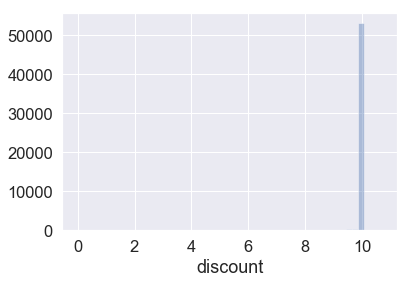

In [137]:
sns.set(font_scale=1.5)
g = sns.distplot(dis_data['discount'], kde=False)

(0, 150)

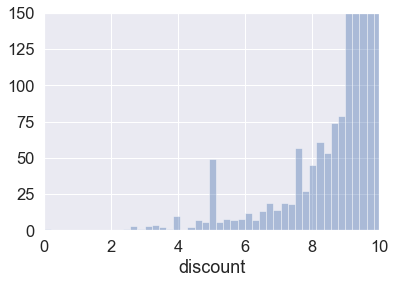

In [138]:
sns.set(font_scale=1.5)
g = sns.distplot(dis_data['discount'], kde=False)##每种discount的频数 
g.set_xlim(0, 10)
g.set_ylim(0, 150)

In [139]:
dis_data[dis_data['discount']<7].groupby('fields.shortInfo')['fields.title'].count().nlargest(5)#打折最厉害的前5个城市

fields.shortInfo
桂林    26
三亚    23
上海    21
香港    10
宜昌     8
Name: fields.title, dtype: int64

#### 7. 各级别景区的门票价格

In [140]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province,discount
26029,武汉,10.0,45.0,17:00前可订今日票,590741590759,5.0,0.0,0.0,45.0,武汉,212.0,121,None,【随买随用自动出票】武汉梵高星空艺术馆大门票武汉自拍网红馆,vocation,湖北省,10.0
50167,天津,0.0,488.0,出票后立即可用,593164106025,0.0,0.0,0.0,488.0,天津,NaN,0,None,天津东方之珠洗浴（南开店） 双人尊享套票,vocation,天津市,10.0
27835,荆州,3.0,19.0,14:00前可订今日票,544548144235,5.0,0.0,0.0,19.0,荆州,24.0,0,None,湖北荆州关羽祠门票 荆州古城卸甲山关羽祠官方 成人票当天可预定,vocation,湖北省,10.0
24118,枣庄,1.0,68.0,19:50前可订今日票,20112180851,4.0,0.0,0.0,68.0,枣庄,146.0,0,None,电子票！山东枣庄市仙坛山温泉小镇温泉票 含鱼疗 成人门票,vocation,山东省,10.0
49156,北京,0.0,45.0,16:00前可订今日票,549101789120,0.0,0.0,0.0,45.0,北京,12.0,0,None,[自动发码]北京野鸭湖国家湿地公园门票 野鸭湖国家湿地公园门票,vocation,北京市,10.0


In [143]:
data_final.groupby('fields.tagList')['fields.price'].mean()

fields.tagList
4A景区      80.308812
5A景区     115.750737
A         75.099000
AA        66.403478
AAA       62.024919
今日可用     148.403143
可订今日票     87.046172
山         98.600000
明日可用     165.576471
景点       147.520263
演出       235.000000
赛事        69.900000
Name: fields.price, dtype: float64

In [144]:
level = ['A', 'AA', 'AAA', '4A景区', '5A景区']
level_data = data_final.groupby('fields.tagList')['fields.price'].mean()[level]#按tagList汇总price的均值，只看level里面有的数据
level_data

fields.tagList
A        75.099000
AA       66.403478
AAA      62.024919
4A景区     80.308812
5A景区    115.750737
Name: fields.price, dtype: float64

In [146]:
# bar = Bar("各级别景区的门票价格", width = 500,height=500)
# bar.add("", level_data.index, np.round(level_data.values,0), is_stack=True, 
#        xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True)
name=[str(i) for i in level_data.index]
value=[int(i) for i in level_data.values]
bar=Bar()
bar.add_xaxis(name)
bar.add_yaxis("",value)
bar.render_notebook()